<a href="https://colab.research.google.com/github/AntF2/Actividad/blob/main/Taller1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 60.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 21.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 55.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB

In [2]:
from pycaret import regression
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
datos = pd.read_csv("datos.csv")
datos

,Character,Universe,Strength,Speed,Intelligence,SpecialAbilities,Weaknesses,BattleOutcome
0,Wonder Woman,Marvel,7,8,3,Telekinesis,Kryptonite,0
1,Iron Man,Marvel,4,7,9,Telekinesis,Kryptonite,0
2,Iron Man,DC Comics,8,7,5,Telekinesis,Magic,0
3,Spider-Man,DC Comics,5,6,10,Telekinesis,Kryptonite,0
4,Flash,Marvel,7,6,2,Invisibility,Magic,0
...,...,...,...,...,...,...,...,...
2346,Superman,DC Comics,9,8,5,Super Strength,Kryptonite,0
2347,Superman,DC Comics,2,5,8,Super Strength,Magic,1
2348,Flash,DC Comics,5,3,3,Telekinesis,Wooden Stake,0
2349,Batman,DC Comics,5,10,6,Flight,Wooden Stake,1


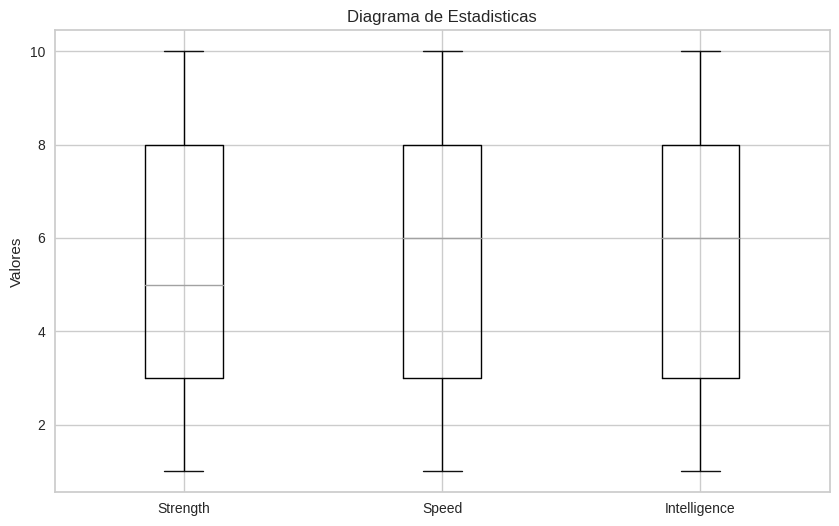

In [4]:
plt.figure(figsize=(10, 6))
datos.boxplot(column=['Strength', 'Speed', 'Intelligence'])
plt.title('Diagrama de Estadisticas')
plt.ylabel('Valores')
plt.show()

In [18]:
exp1 = regression.setup(
    data = datos,
    target = "Speed",
    numeric_imputation = "mean",
    remove_multicollinearity = True,
    multicollinearity_threshold = 0.95,
    session_id = 123,
    polynomial_features = True,
    polynomial_degree = 2,
    feature_selection = True,
    n_features_to_select = 0.8,
    pca = True,
    pca_components = 8,
    normalize = True,
    normalize_method = "zscore"
)


,Description,Value
0,Session id,123
1,Target,Speed
2,Target type,Regression
3,Original data shape,"(2351, 8)"
4,Transformed data shape,"(2351, 6)"
5,Transformed train set shape,"(1645, 6)"
6,Transformed test set shape,"(706, 6)"
7,Numeric features,3
8,Categorical features,4
9,Preprocess,True


In [19]:
reg1 = regression.compare_models()


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,2.4365,7.9912,2.8254,0.0048,0.5310,0.8783,0.7700
br,Bayesian Ridge,2.4404,7.9933,2.8259,0.0045,0.5312,0.8795,0.7110
ridge,Ridge Regression,2.4346,7.9945,2.8260,0.0043,0.5310,0.8776,0.6330
omp,Orthogonal Matching Pursuit,2.4431,8.0075,2.8285,0.0026,0.5315,0.8801,0.5110
lar,Least Angle Regression,2.4387,8.0232,2.8309,0.0010,0.5318,0.8800,0.5180
huber,Huber Regressor,2.4402,8.0407,2.8339,-0.0011,0.5327,0.8830,0.7310
en,Elastic Net,2.4567,8.0405,2.8342,-0.0014,0.5326,0.8842,0.8360
lasso,Lasso Regression,2.4653,8.0827,2.8416,-0.0066,0.5336,0.8867,0.5130
dummy,Dummy Regressor,2.4653,8.0827,2.8416,-0.0066,0.5336,0.8867,0.6650
llar,Lasso Least Angle Regression,2.4653,8.0827,2.8416,-0.0066,0.5336,0.8867,0.7630


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [17]:
exp2 = regression.setup(
    data = datos,
    target = "Speed",
    numeric_imputation = "mean",
    remove_multicollinearity = False,
    session_id = 123,
    polynomial_features = True,
    polynomial_degree = 2,
    feature_selection = False,
    pca = True,
    pca_components = 10,
    normalize = True,
    normalize_method = "zscore"
)


,Description,Value
0,Session id,123
1,Target,Speed
2,Target type,Regression
3,Original data shape,"(2351, 8)"
4,Transformed data shape,"(2351, 11)"
5,Transformed train set shape,"(1645, 11)"
6,Transformed test set shape,"(706, 11)"
7,Numeric features,3
8,Categorical features,4
9,Preprocess,True


In [9]:
reg2 = regression.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,2.4640,8.0871,2.8428,0.0039,0.5335,0.8833,0.5600
lr,Linear Regression,2.4580,8.0914,2.8434,0.0034,0.5334,0.8817,0.5080
ridge,Ridge Regression,2.4580,8.0914,2.8434,0.0034,0.5334,0.8817,0.3380
lar,Least Angle Regression,2.4580,8.0914,2.8434,0.0034,0.5334,0.8817,0.3770
omp,Orthogonal Matching Pursuit,2.4728,8.1231,2.8493,-0.0008,0.5345,0.8852,0.3380
huber,Huber Regressor,2.4566,8.1286,2.8498,-0.0011,0.5335,0.8790,0.3370
en,Elastic Net,2.4810,8.1357,2.8514,-0.0021,0.5348,0.8874,0.5110
llar,Lasso Least Angle Regression,2.4860,8.1588,2.8555,-0.0050,0.5351,0.8876,0.3420
dummy,Dummy Regressor,2.4860,8.1588,2.8555,-0.0050,0.5351,0.8876,0.3860
lasso,Lasso Regression,2.4860,8.1588,2.8555,-0.0050,0.5351,0.8876,0.3340


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [10]:
exp3 = regression.setup(
    data = datos,
    target = "Speed",
    numeric_imputation = "mean",
    remove_multicollinearity = True,
    multicollinearity_threshold = 0.95,
    session_id = 123,
    polynomial_features = False,
    feature_selection = True,
    n_features_to_select = 0.8,
    pca = False,
    normalize = True,
    normalize_method = "zscore"
)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004796 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 966
[LightGBM] [Info] Number of data points in the train set: 1674, number of used features: 190
[LightGBM] [Info] Start training from score 5.464755


,Description,Value
0,Session id,4804
1,Target,Speed
2,Target type,Regression
3,Original data shape,"(2351, 8)"
4,Transformed data shape,"(2262, 6)"
5,Transformed train set shape,"(1674, 6)"
6,Transformed test set shape,"(588, 6)"
7,Numeric features,3
8,Categorical features,4
9,Preprocess,True


In [11]:
reg3 = regression.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,2.4831,8.1500,2.8529,-0.0062,0.5381,0.9018,0.5090
llar,Lasso Least Angle Regression,2.4831,8.1500,2.8529,-0.0062,0.5381,0.9018,0.4390
dummy,Dummy Regressor,2.4831,8.1500,2.8529,-0.0062,0.5381,0.9018,0.6310
en,Elastic Net,2.4831,8.1500,2.8529,-0.0062,0.5381,0.9018,0.6540
omp,Orthogonal Matching Pursuit,2.4786,8.1534,2.8538,-0.0071,0.5378,0.8985,0.6970
br,Bayesian Ridge,2.4814,8.1614,2.8551,-0.0080,0.5378,0.8987,0.4370
ridge,Ridge Regression,2.4805,8.1830,2.8590,-0.0111,0.5382,0.8976,0.4380
lr,Linear Regression,2.4805,8.1832,2.8590,-0.0111,0.5382,0.8976,0.6000
huber,Huber Regressor,2.4805,8.2119,2.8641,-0.0150,0.5388,0.8974,0.7070
ada,AdaBoost Regressor,2.4859,8.2261,2.8663,-0.0160,0.5391,0.8994,0.6490


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [13]:
exp4 = regression.setup(
    data = datos,
    target = "Speed",
    numeric_imputation = "mean",
    remove_multicollinearity = False,
    session_id = 123,
    polynomial_features = True,
    polynomial_degree = 3,
    feature_selection = False,
    pca = True,
    pca_components = 6,
    normalize = True,
    normalize_method = "minmax"
)


,Description,Value
0,Session id,123
1,Target,Speed
2,Target type,Regression
3,Original data shape,"(2351, 8)"
4,Transformed data shape,"(2351, 21)"
5,Transformed train set shape,"(1645, 21)"
6,Transformed test set shape,"(706, 21)"
7,Numeric features,3
8,Categorical features,4
9,Preprocess,True


In [14]:
reg4 = regression.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,2.4015,7.7835,2.7886,0.0303,0.5241,0.8587,0.1220
br,Bayesian Ridge,2.4023,7.7959,2.7906,0.0292,0.5245,0.8598,0.1210
ridge,Ridge Regression,2.3954,7.8064,2.7924,0.0278,0.5237,0.8543,0.1960
lar,Least Angle Regression,2.3952,7.8073,2.7925,0.0277,0.5237,0.8542,0.1230
lr,Linear Regression,2.3955,7.8082,2.7927,0.0276,0.5238,0.8543,0.6730
ada,AdaBoost Regressor,2.4112,7.8673,2.8034,0.0203,0.5261,0.8617,0.1710
huber,Huber Regressor,2.3968,7.8891,2.8070,0.0174,0.5248,0.8522,0.1400
lasso,Lasso Regression,2.4653,8.0827,2.8416,-0.0066,0.5336,0.8867,0.1860
llar,Lasso Least Angle Regression,2.4653,8.0827,2.8416,-0.0066,0.5336,0.8867,0.1200
en,Elastic Net,2.4653,8.0827,2.8416,-0.0066,0.5336,0.8867,0.2060


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [20]:
exp5 = regression.setup(
    data = datos,
    target = "Speed",
    numeric_imputation = "mean",
    remove_multicollinearity = True,
    multicollinearity_threshold = 0.90,
    session_id = 123,
    polynomial_features = True,
    polynomial_degree = 2,
    feature_selection = True,
    n_features_to_select = 0.7,
    pca = False,
    normalize = True,
    normalize_method = "robust"
)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000841 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 698
[LightGBM] [Info] Number of data points in the train set: 1645, number of used features: 168
[LightGBM] [Info] Start training from score 5.545897


,Description,Value
0,Session id,123
1,Target,Speed
2,Target type,Regression
3,Original data shape,"(2351, 8)"
4,Transformed data shape,"(2351, 5)"
5,Transformed train set shape,"(1645, 5)"
6,Transformed test set shape,"(706, 5)"
7,Numeric features,3
8,Categorical features,4
9,Preprocess,True


In [21]:
reg5 = regression.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,2.4653,8.0827,2.8416,-0.0066,0.5336,0.8867,0.5600
br,Bayesian Ridge,2.4654,8.0829,2.8417,-0.0066,0.5336,0.8867,0.6790
en,Elastic Net,2.4653,8.0827,2.8416,-0.0066,0.5336,0.8867,0.5500
dummy,Dummy Regressor,2.4653,8.0827,2.8416,-0.0066,0.5336,0.8867,0.6700
llar,Lasso Least Angle Regression,2.4653,8.0827,2.8416,-0.0066,0.5336,0.8867,0.5550
ada,AdaBoost Regressor,2.4604,8.0975,2.8442,-0.0084,0.5327,0.8807,0.5450
omp,Orthogonal Matching Pursuit,2.4677,8.1016,2.8450,-0.0090,0.5339,0.8869,0.6160
ridge,Ridge Regression,2.4684,8.1158,2.8475,-0.0107,0.5344,0.8878,0.8310
lar,Least Angle Regression,2.4685,8.1161,2.8475,-0.0108,0.5344,0.8878,0.7170
lr,Linear Regression,2.4685,8.1161,2.8475,-0.0108,0.5344,0.8878,1.3680


Processing:   0%|          | 0/81 [00:00<?, ?it/s]